In [11]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

#c(도) d e f g a b(시)
#4(4분음표), 8(8분음표)
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [ ]:
#pip install gTTS

In [1]:
from gtts import gTTS

In [4]:
texte = "Hi, everybody. Playing with TF is fun."
tts = gTTS(text=texte, lang='en')
tts.save("hi.mp3")

In [5]:
textk = "안녕하세요. 여러분, 텐서플로우 재미있어요."
tts = gTTS(text=textk, lang='ko')
tts.save("hiko.mp3")

In [6]:
ttsEn = gTTS(text=texte, lang='en')
ttsKr = gTTS(text=textk, lang='ko')

In [7]:
f = open("enkr.mp3", 'wb')
ttsEn.write_to_fp(f)
ttsEn.write_to_fp(f)
ttsKr.write_to_fp(f)
f.close()

In [8]:
import numpy as np

In [12]:
def seq2dataset(seq, windowSize):
    dataset=[]
    for i in range(len(seq)-windowSize):  #54-4=50
        subset = seq[i:(i+windowSize+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [13]:
dataset = seq2dataset(seq, windowSize=4)
dataset.shape

(50, 5)

In [14]:
xTrain = dataset[:,0:4] #나 비 야 나...
yTrain = dataset[:,4] #비...
maxIdxValue=13

In [15]:
#입력값 정규화
xTrain = xTrain/maxIdxValue
xTrain

array([[0.84615385, 0.69230769, 0.15384615, 0.76923077],
       [0.69230769, 0.15384615, 0.76923077, 0.61538462],
       [0.15384615, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462, 0.07692308, 0.53846154],
       [0.61538462, 0.07692308, 0.53846154, 0.61538462],
       [0.07692308, 0.53846154, 0.61538462, 0.69230769],
       [0.53846154, 0.61538462, 0.69230769, 0.76923077],
       [0.61538462, 0.69230769, 0.76923077, 0.84615385],
       [0.69230769, 0.76923077, 0.84615385, 0.84615385],
       [0.76923077, 0.84615385, 0.84615385, 0.30769231],
       [0.84615385, 0.84615385, 0.30769231, 0.84615385],
       [0.84615385, 0.30769231, 0.84615385, 0.69230769],
       [0.30769231, 0.84615385, 0.69230769, 0.69230769],
       [0.84615385, 0.69230769, 0.69230769, 0.69230769],
       [0.69230769, 0.69230769, 0.69230769, 0.76923077],
       [0.69230769, 0.69230769, 0.76923077, 0.61538462],
       [0.69230769, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462,

In [17]:
from keras.utils import np_utils
yTrain = np_utils.to_categorical(yTrain) #원핫인코딩
yTrain.shape  #(50, ) -> (50, 12)

(50, 12)

In [18]:
oneHotVecSize = yTrain.shape[1] #음계의 종류 수 => 12 가지 음계

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [20]:
#모델 생성
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(oneHotVecSize, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 12)                1548      
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
_________________________________________________________________


In [22]:
#모델 학습과정
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [23]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses=[]
    def onEpochEnd(self,batch,logs={}):
        self.losses.append(logs.get('loss'))

In [24]:
history = LossHistory()
history.init()

In [26]:
model.fit(xTrain,yTrain,epochs=2000, batch_size=10, callbacks=[history])

Epoch 1/2000
50/50 [==============================] - 0s 2ms/step - loss: 2.4473 - accuracy: 0.1600
Epoch 2/2000
50/50 [==============================] - 0s 160us/step - loss: 2.3602 - accuracy: 0.3400
Epoch 3/2000
50/50 [==============================] - 0s 120us/step - loss: 2.2705 - accuracy: 0.3400
Epoch 4/2000
50/50 [==============================] - 0s 160us/step - loss: 2.1826 - accuracy: 0.3400
Epoch 5/2000
50/50 [==============================] - 0s 140us/step - loss: 2.1066 - accuracy: 0.3400
Epoch 6/2000
50/50 [==============================] - 0s 160us/step - loss: 2.0342 - accuracy: 0.3400
Epoch 7/2000
50/50 [==============================] - 0s 120us/step - loss: 1.9762 - accuracy: 0.3400
Epoch 8/2000
50/50 [==============================] - 0s 160us/step - loss: 1.9365 - accuracy: 0.3400
Epoch 9/2000
50/50 [==============================] - 0s 121us/step - loss: 1.9146 - accuracy: 0.3400
Epoch 10/2000
50/50 [==============================] - 0s 160us/step - loss: 1.8894 

50/50 [==============================] - 0s 120us/step - loss: 1.1879 - accuracy: 0.6000
Epoch 159/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1938 - accuracy: 0.6000
Epoch 160/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1877 - accuracy: 0.5600
Epoch 161/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1826 - accuracy: 0.5800
Epoch 162/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1826 - accuracy: 0.5800
Epoch 163/2000
50/50 [==============================] - 0s 120us/step - loss: 1.1822 - accuracy: 0.5800
Epoch 164/2000
50/50 [==============================] - 0s 120us/step - loss: 1.1788 - accuracy: 0.6000
Epoch 165/2000
50/50 [==============================] - 0s 120us/step - loss: 1.1753 - accuracy: 0.6000
Epoch 166/2000
50/50 [==============================] - 0s 160us/step - loss: 1.1710 - accuracy: 0.6000
Epoch 167/2000
50/50 [==============================] - 0s 140us/step - loss: 1

50/50 [==============================] - 0s 120us/step - loss: 0.9100 - accuracy: 0.6200
Epoch 315/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9062 - accuracy: 0.6600
Epoch 316/2000
50/50 [==============================] - 0s 120us/step - loss: 0.9095 - accuracy: 0.6600
Epoch 317/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9089 - accuracy: 0.6200
Epoch 318/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9004 - accuracy: 0.6200
Epoch 319/2000
50/50 [==============================] - 0s 120us/step - loss: 0.9057 - accuracy: 0.6800
Epoch 320/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9021 - accuracy: 0.6600
Epoch 321/2000
50/50 [==============================] - 0s 120us/step - loss: 0.9028 - accuracy: 0.6600
Epoch 322/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8964 - accuracy: 0.6600
Epoch 323/2000
50/50 [==============================] - 0s 120us/step - loss: 0

50/50 [==============================] - 0s 120us/step - loss: 0.8066 - accuracy: 0.6600
Epoch 393/2000
50/50 [==============================] - 0s 120us/step - loss: 0.8079 - accuracy: 0.6600
Epoch 394/2000
50/50 [==============================] - 0s 120us/step - loss: 0.8022 - accuracy: 0.6800
Epoch 395/2000
50/50 [==============================] - 0s 160us/step - loss: 0.7964 - accuracy: 0.7000
Epoch 396/2000
50/50 [==============================] - 0s 120us/step - loss: 0.7976 - accuracy: 0.7000
Epoch 397/2000
50/50 [==============================] - 0s 120us/step - loss: 0.8108 - accuracy: 0.6400
Epoch 398/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8025 - accuracy: 0.7200
Epoch 399/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8055 - accuracy: 0.7000
Epoch 400/2000
50/50 [==============================] - 0s 120us/step - loss: 0.7971 - accuracy: 0.7000
Epoch 401/2000
50/50 [==============================] - 0s 120us/step - loss: 0

50/50 [==============================] - 0s 120us/step - loss: 0.6446 - accuracy: 0.7600
Epoch 549/2000
50/50 [==============================] - 0s 120us/step - loss: 0.6329 - accuracy: 0.7600
Epoch 550/2000
50/50 [==============================] - 0s 140us/step - loss: 0.6432 - accuracy: 0.7800
Epoch 551/2000
50/50 [==============================] - 0s 140us/step - loss: 0.6365 - accuracy: 0.7800
Epoch 552/2000
50/50 [==============================] - 0s 120us/step - loss: 0.6353 - accuracy: 0.7600
Epoch 553/2000
50/50 [==============================] - 0s 120us/step - loss: 0.6515 - accuracy: 0.7000
Epoch 554/2000
50/50 [==============================] - 0s 140us/step - loss: 0.6372 - accuracy: 0.7600
Epoch 555/2000
50/50 [==============================] - 0s 100us/step - loss: 0.6447 - accuracy: 0.7400
Epoch 556/2000
50/50 [==============================] - 0s 120us/step - loss: 0.6420 - accuracy: 0.7600
Epoch 557/2000
50/50 [==============================] - 0s 120us/step - loss: 0

50/50 [==============================] - 0s 120us/step - loss: 0.5776 - accuracy: 0.7600
Epoch 627/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5743 - accuracy: 0.8000
Epoch 628/2000
50/50 [==============================] - 0s 120us/step - loss: 0.5746 - accuracy: 0.7400
Epoch 629/2000
50/50 [==============================] - 0s 120us/step - loss: 0.5819 - accuracy: 0.7400
Epoch 630/2000
50/50 [==============================] - 0s 160us/step - loss: 0.5898 - accuracy: 0.8000
Epoch 631/2000
50/50 [==============================] - 0s 100us/step - loss: 0.5740 - accuracy: 0.7600
Epoch 632/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5787 - accuracy: 0.7600
Epoch 633/2000
50/50 [==============================] - 0s 120us/step - loss: 0.5700 - accuracy: 0.7600
Epoch 634/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5643 - accuracy: 0.7600
Epoch 635/2000
50/50 [==============================] - 0s 100us/step - loss: 0

Epoch 782/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4721 - accuracy: 0.8000
Epoch 783/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4660 - accuracy: 0.8200
Epoch 784/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4698 - accuracy: 0.8000
Epoch 785/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4685 - accuracy: 0.8000
Epoch 786/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4753 - accuracy: 0.8200
Epoch 787/2000
50/50 [==============================] - 0s 100us/step - loss: 0.4725 - accuracy: 0.8400
Epoch 788/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4882 - accuracy: 0.7800
Epoch 789/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4598 - accuracy: 0.8200
Epoch 790/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4709 - accuracy: 0.8200
Epoch 791/2000
50/50 [==============================] - 0s 100us

50/50 [==============================] - 0s 120us/step - loss: 0.4030 - accuracy: 0.8400
Epoch 939/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3950 - accuracy: 0.8400
Epoch 940/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3947 - accuracy: 0.8600
Epoch 941/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3888 - accuracy: 0.8800
Epoch 942/2000
50/50 [==============================] - ETA: 0s - loss: 0.5261 - accuracy: 0.70 - 0s 120us/step - loss: 0.3894 - accuracy: 0.8800
Epoch 943/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3906 - accuracy: 0.8200
Epoch 944/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3875 - accuracy: 0.8600
Epoch 945/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3947 - accuracy: 0.8800
Epoch 946/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3888 - accuracy: 0.8200
Epoch 947/2000
50/50 [===============

Epoch 1016/2000
50/50 [==============================] - 0s 100us/step - loss: 0.3752 - accuracy: 0.8600
Epoch 1017/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3606 - accuracy: 0.8600
Epoch 1018/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3601 - accuracy: 0.8800
Epoch 1019/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3581 - accuracy: 0.8800
Epoch 1020/2000
50/50 [==============================] - 0s 100us/step - loss: 0.3540 - accuracy: 0.9000
Epoch 1021/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3630 - accuracy: 0.8800
Epoch 1022/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3574 - accuracy: 0.8800
Epoch 1023/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3516 - accuracy: 0.8600
Epoch 1024/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3540 - accuracy: 0.8800
Epoch 1025/2000
50/50 [==============================] 

50/50 [==============================] - 0s 140us/step - loss: 0.3277 - accuracy: 0.8800
Epoch 1095/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3294 - accuracy: 0.9000
Epoch 1096/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3357 - accuracy: 0.8800
Epoch 1097/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3222 - accuracy: 0.9200
Epoch 1098/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3305 - accuracy: 0.8800
Epoch 1099/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3316 - accuracy: 0.9000
Epoch 1100/2000
50/50 [==============================] - 0s 100us/step - loss: 0.3248 - accuracy: 0.9200
Epoch 1101/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3225 - accuracy: 0.9200
Epoch 1102/2000
50/50 [==============================] - 0s 100us/step - loss: 0.3249 - accuracy: 0.8800
Epoch 1103/2000
50/50 [==============================] - 0s 120us/step 

50/50 [==============================] - 0s 120us/step - loss: 0.2914 - accuracy: 0.9000
Epoch 1251/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2863 - accuracy: 0.9000
Epoch 1252/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2821 - accuracy: 0.9000
Epoch 1253/2000
50/50 [==============================] - 0s 100us/step - loss: 0.2842 - accuracy: 0.9200
Epoch 1254/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2829 - accuracy: 0.9000
Epoch 1255/2000
50/50 [==============================] - 0s 100us/step - loss: 0.2757 - accuracy: 0.9200
Epoch 1256/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2859 - accuracy: 0.9000
Epoch 1257/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2771 - accuracy: 0.9000
Epoch 1258/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2785 - accuracy: 0.9200
Epoch 1259/2000
50/50 [==============================] - 0s 120us/step 

50/50 [==============================] - 0s 200us/step - loss: 0.2604 - accuracy: 0.9200
Epoch 1406/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2477 - accuracy: 0.9200
Epoch 1407/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2606 - accuracy: 0.8800
Epoch 1408/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2432 - accuracy: 0.8800
Epoch 1409/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2649 - accuracy: 0.9000
Epoch 1410/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2403 - accuracy: 0.9400
Epoch 1411/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2766 - accuracy: 0.9000
Epoch 1412/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2690 - accuracy: 0.8800
Epoch 1413/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2455 - accuracy: 0.9200
Epoch 1414/2000
50/50 [==============================] - 0s 120us/step 

50/50 [==============================] - 0s 140us/step - loss: 0.2149 - accuracy: 0.9000
Epoch 1562/2000
50/50 [==============================] - ETA: 0s - loss: 0.2592 - accuracy: 0.90 - 0s 120us/step - loss: 0.2159 - accuracy: 0.9200
Epoch 1563/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2162 - accuracy: 0.9000
Epoch 1564/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2253 - accuracy: 0.9200
Epoch 1565/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2134 - accuracy: 0.9200
Epoch 1566/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2164 - accuracy: 0.9200
Epoch 1567/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2218 - accuracy: 0.9200
Epoch 1568/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2157 - accuracy: 0.9200
Epoch 1569/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2220 - accuracy: 0.9000
Epoch 1570/2000
50/50 [======

50/50 [==============================] - 0s 160us/step - loss: 0.2001 - accuracy: 0.9000
Epoch 1716/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2105 - accuracy: 0.9000
Epoch 1717/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1976 - accuracy: 0.9200
Epoch 1718/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1948 - accuracy: 0.9200
Epoch 1719/2000
50/50 [==============================] - 0s 120us/step - loss: 0.1949 - accuracy: 0.9200
Epoch 1720/2000
50/50 [==============================] - 0s 120us/step - loss: 0.1957 - accuracy: 0.9200
Epoch 1721/2000
50/50 [==============================] - 0s 100us/step - loss: 0.2028 - accuracy: 0.9200
Epoch 1722/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1950 - accuracy: 0.9200
Epoch 1723/2000
50/50 [==============================] - 0s 100us/step - loss: 0.2126 - accuracy: 0.9000
Epoch 1724/2000
50/50 [==============================] - 0s 140us/step 

50/50 [==============================] - 0s 160us/step - loss: 0.1791 - accuracy: 0.9000
Epoch 1871/2000
50/50 [==============================] - 0s 120us/step - loss: 0.1844 - accuracy: 0.9200
Epoch 1872/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1835 - accuracy: 0.9000
Epoch 1873/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1875 - accuracy: 0.9200
Epoch 1874/2000
50/50 [==============================] - 0s 120us/step - loss: 0.1826 - accuracy: 0.9000
Epoch 1875/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2056 - accuracy: 0.9200
Epoch 1876/2000
50/50 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 1.00 - 0s 100us/step - loss: 0.1884 - accuracy: 0.9200
Epoch 1877/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1968 - accuracy: 0.9200
Epoch 1878/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2018 - accuracy: 0.9200
Epoch 1879/2000
50/50 [======

In [27]:
import matplotlib.pyplot as plt

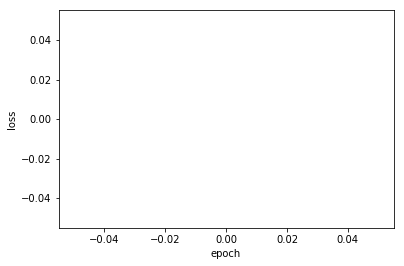

In [28]:
# plt.plot(history.losses)
# plt.ylabel("loss")
# plt.xlabel("epoch")
# plt.show()

In [40]:
scores = model.evaluate(xTrain,yTrain)
print("%s : %.2f%%" %(model.metrics_names[1]),scores[1]*100)

50/50 [==============================] - 0s 60us/step


TypeError: not enough arguments for format string

In [42]:
seqOut = ['g8', 'e8', 'e4', 'f8']
predOut = model.predict(xTrain)

In [43]:
predOut.shape #(50, 12)

(50, 12)

In [45]:
predCount=50
for i in range(predCount):
    idx = np.argmax(predOut[i])
    seqOut.append(idx2code[idx])
print(seqOut)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [46]:
from pygame import mixer

ModuleNotFoundError: No module named 'pygame'

In [ ]:
mixer.init()
mixer.music.load("sound1.mp3")
mixer.music.play()
mixer.music.load("sound3.mp3")
mixer.music.play()
#https://www.pygame.org/

In [55]:
#곡 전체 예측
seqIn = ['g8','e8','e4','f8']
seqOut = seqIn
seqIn = [code2idx[it]/float(maxIdxValue) for it in seqIn]

In [56]:
for i in range(predCount):
    seqIn2 = np.array(seqIn) 
#     print(np.shape(seqIn))
    seqIn2 = np.reshape(seqIn2, (1,4)) #1:batch size, 4:features
    predOut = model.predict(seqIn2)
    idx = np.argmax(predOut)
    seqOut.append(idx2code[idx])
    seqIn.append(idx/float(maxIdxValue))
    seqIn.pop(0)
print(seqOut)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [58]:
from keras.layers import LSTM

In [59]:
model = Sequential() 
model.add(LSTM(128, input_shape=(4,1))) #128출력셀, 4:타임스텝, 1:속성개수
#stateful=False
model.add(Dense(oneHotVecSize, activation='softmax'))
"""
time step(window size): 샘플 1개에 포함된 시퀀스의 개수(input_length)
속성: 입력되는 음표 1개당 index 1개 입력
"""

In [60]:
np.shape(xTrain) #샘플수, 타임스텝, 속성수
xTrain = np.reshape(xTrain,(50,4,1))

In [61]:
#모델 학습과정
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [62]:
model.fit(xTrain,yTrain,epochs=2000, batch_size=14, callbacks=[history])

Epoch 1/2000
50/50 [==============================] - 0s 7ms/step - loss: 2.4735 - accuracy: 0.1800
Epoch 2/2000
50/50 [==============================] - 0s 300us/step - loss: 2.4304 - accuracy: 0.2600
Epoch 3/2000
50/50 [==============================] - 0s 340us/step - loss: 2.3906 - accuracy: 0.3400
Epoch 4/2000
50/50 [==============================] - 0s 300us/step - loss: 2.3432 - accuracy: 0.3400
Epoch 5/2000
50/50 [==============================] - 0s 340us/step - loss: 2.2924 - accuracy: 0.3400
Epoch 6/2000
50/50 [==============================] - 0s 319us/step - loss: 2.2301 - accuracy: 0.3400
Epoch 7/2000
50/50 [==============================] - 0s 320us/step - loss: 2.1620 - accuracy: 0.3400
Epoch 8/2000
50/50 [==============================] - 0s 320us/step - loss: 2.0715 - accuracy: 0.3400
Epoch 9/2000
50/50 [==============================] - 0s 320us/step - loss: 2.0083 - accuracy: 0.3400
Epoch 10/2000
50/50 [==============================] - 0s 340us/step - loss: 1.9790 

50/50 [==============================] - 0s 320us/step - loss: 1.5968 - accuracy: 0.4600
Epoch 159/2000
50/50 [==============================] - 0s 340us/step - loss: 1.5942 - accuracy: 0.4600
Epoch 160/2000
50/50 [==============================] - 0s 320us/step - loss: 1.5849 - accuracy: 0.4200
Epoch 161/2000
50/50 [==============================] - 0s 340us/step - loss: 1.5839 - accuracy: 0.4200
Epoch 162/2000
50/50 [==============================] - 0s 300us/step - loss: 1.5823 - accuracy: 0.4000
Epoch 163/2000
50/50 [==============================] - 0s 320us/step - loss: 1.5831 - accuracy: 0.4200
Epoch 164/2000
50/50 [==============================] - 0s 300us/step - loss: 1.5785 - accuracy: 0.4400
Epoch 165/2000
50/50 [==============================] - 0s 280us/step - loss: 1.5803 - accuracy: 0.4600
Epoch 166/2000
50/50 [==============================] - 0s 300us/step - loss: 1.5862 - accuracy: 0.4400
Epoch 167/2000
50/50 [==============================] - 0s 280us/step - loss: 1

50/50 [==============================] - 0s 300us/step - loss: 1.2484 - accuracy: 0.5800
Epoch 315/2000
50/50 [==============================] - 0s 320us/step - loss: 1.2359 - accuracy: 0.5800
Epoch 316/2000
50/50 [==============================] - 0s 340us/step - loss: 1.2484 - accuracy: 0.5400
Epoch 317/2000
50/50 [==============================] - 0s 320us/step - loss: 1.2443 - accuracy: 0.5400
Epoch 318/2000
50/50 [==============================] - 0s 320us/step - loss: 1.2371 - accuracy: 0.5000
Epoch 319/2000
50/50 [==============================] - 0s 300us/step - loss: 1.2333 - accuracy: 0.4800
Epoch 320/2000
50/50 [==============================] - 0s 300us/step - loss: 1.2479 - accuracy: 0.5200
Epoch 321/2000
50/50 [==============================] - 0s 280us/step - loss: 1.2440 - accuracy: 0.5600
Epoch 322/2000
50/50 [==============================] - 0s 300us/step - loss: 1.2249 - accuracy: 0.5200
Epoch 323/2000
50/50 [==============================] - 0s 320us/step - loss: 1

50/50 [==============================] - 0s 340us/step - loss: 0.9349 - accuracy: 0.5800
Epoch 471/2000
50/50 [==============================] - 0s 320us/step - loss: 0.9481 - accuracy: 0.6400
Epoch 472/2000
50/50 [==============================] - 0s 320us/step - loss: 0.9303 - accuracy: 0.6200
Epoch 473/2000
50/50 [==============================] - 0s 320us/step - loss: 0.9280 - accuracy: 0.6400
Epoch 474/2000
50/50 [==============================] - 0s 320us/step - loss: 0.9255 - accuracy: 0.6600
Epoch 475/2000
50/50 [==============================] - 0s 320us/step - loss: 0.9168 - accuracy: 0.6200
Epoch 476/2000
50/50 [==============================] - 0s 320us/step - loss: 0.9199 - accuracy: 0.6200
Epoch 477/2000
50/50 [==============================] - 0s 320us/step - loss: 0.9312 - accuracy: 0.6200
Epoch 478/2000
50/50 [==============================] - 0s 300us/step - loss: 0.9661 - accuracy: 0.6000
Epoch 479/2000
50/50 [==============================] - 0s 300us/step - loss: 0

50/50 [==============================] - 0s 340us/step - loss: 0.7986 - accuracy: 0.7200
Epoch 549/2000
50/50 [==============================] - 0s 320us/step - loss: 0.8048 - accuracy: 0.6800
Epoch 550/2000
50/50 [==============================] - 0s 320us/step - loss: 0.8066 - accuracy: 0.6800
Epoch 551/2000
50/50 [==============================] - 0s 320us/step - loss: 0.8009 - accuracy: 0.6400
Epoch 552/2000
50/50 [==============================] - 0s 320us/step - loss: 0.8029 - accuracy: 0.7000
Epoch 553/2000
50/50 [==============================] - 0s 320us/step - loss: 0.7875 - accuracy: 0.6800
Epoch 554/2000
50/50 [==============================] - 0s 320us/step - loss: 0.8108 - accuracy: 0.6600
Epoch 555/2000
50/50 [==============================] - 0s 320us/step - loss: 0.7932 - accuracy: 0.6600
Epoch 556/2000
50/50 [==============================] - 0s 300us/step - loss: 0.8201 - accuracy: 0.7000
Epoch 557/2000
50/50 [==============================] - 0s 320us/step - loss: 0

50/50 [==============================] - 0s 320us/step - loss: 0.6197 - accuracy: 0.8000
Epoch 705/2000
50/50 [==============================] - 0s 340us/step - loss: 0.6219 - accuracy: 0.8000
Epoch 706/2000
50/50 [==============================] - 0s 300us/step - loss: 0.6067 - accuracy: 0.8200
Epoch 707/2000
50/50 [==============================] - 0s 303us/step - loss: 0.6158 - accuracy: 0.7600
Epoch 708/2000
50/50 [==============================] - 0s 300us/step - loss: 0.6301 - accuracy: 0.7800
Epoch 709/2000
50/50 [==============================] - 0s 320us/step - loss: 0.5994 - accuracy: 0.8200
Epoch 710/2000
50/50 [==============================] - 0s 340us/step - loss: 0.6303 - accuracy: 0.7400
Epoch 711/2000
50/50 [==============================] - 0s 320us/step - loss: 0.6007 - accuracy: 0.8200
Epoch 712/2000
50/50 [==============================] - 0s 300us/step - loss: 0.6304 - accuracy: 0.8200
Epoch 713/2000
50/50 [==============================] - 0s 320us/step - loss: 0

50/50 [==============================] - 0s 320us/step - loss: 0.4927 - accuracy: 0.8800
Epoch 861/2000
50/50 [==============================] - 0s 320us/step - loss: 0.5131 - accuracy: 0.8400
Epoch 862/2000
50/50 [==============================] - 0s 320us/step - loss: 0.5140 - accuracy: 0.8400
Epoch 863/2000
50/50 [==============================] - 0s 320us/step - loss: 0.4931 - accuracy: 0.8400
Epoch 864/2000
50/50 [==============================] - 0s 320us/step - loss: 0.4944 - accuracy: 0.8400
Epoch 865/2000
50/50 [==============================] - 0s 300us/step - loss: 0.4908 - accuracy: 0.8400
Epoch 866/2000
50/50 [==============================] - 0s 320us/step - loss: 0.5000 - accuracy: 0.8200
Epoch 867/2000
50/50 [==============================] - 0s 300us/step - loss: 0.5052 - accuracy: 0.8400
Epoch 868/2000
50/50 [==============================] - 0s 320us/step - loss: 0.4866 - accuracy: 0.8400
Epoch 869/2000
50/50 [==============================] - 0s 340us/step - loss: 0

Epoch 1016/2000
50/50 [==============================] - 0s 340us/step - loss: 0.4435 - accuracy: 0.8600
Epoch 1017/2000
50/50 [==============================] - 0s 340us/step - loss: 0.4361 - accuracy: 0.8400
Epoch 1018/2000
50/50 [==============================] - 0s 320us/step - loss: 0.4384 - accuracy: 0.8600
Epoch 1019/2000
50/50 [==============================] - 0s 340us/step - loss: 0.4353 - accuracy: 0.8600
Epoch 1020/2000
50/50 [==============================] - 0s 300us/step - loss: 0.4455 - accuracy: 0.8600
Epoch 1021/2000
50/50 [==============================] - 0s 340us/step - loss: 0.4404 - accuracy: 0.8600
Epoch 1022/2000
50/50 [==============================] - 0s 340us/step - loss: 0.4346 - accuracy: 0.8400
Epoch 1023/2000
50/50 [==============================] - 0s 320us/step - loss: 0.4264 - accuracy: 0.8600
Epoch 1024/2000
50/50 [==============================] - 0s 340us/step - loss: 0.4399 - accuracy: 0.8600
Epoch 1025/2000
50/50 [==============================] 

50/50 [==============================] - 0s 320us/step - loss: 0.3980 - accuracy: 0.8400
Epoch 1173/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3971 - accuracy: 0.8600
Epoch 1174/2000
50/50 [==============================] - 0s 320us/step - loss: 0.4012 - accuracy: 0.8600
Epoch 1175/2000
50/50 [==============================] - 0s 340us/step - loss: 0.3867 - accuracy: 0.8600
Epoch 1176/2000
50/50 [==============================] - 0s 320us/step - loss: 0.4124 - accuracy: 0.8600
Epoch 1177/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3928 - accuracy: 0.8600
Epoch 1178/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3912 - accuracy: 0.8800
Epoch 1179/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3839 - accuracy: 0.8800
Epoch 1180/2000
50/50 [==============================] - 0s 500us/step - loss: 0.4002 - accuracy: 0.8600
Epoch 1181/2000
50/50 [==============================] - 0s 380us/step 

50/50 [==============================] - 0s 340us/step - loss: 0.3562 - accuracy: 0.8800
Epoch 1328/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3880 - accuracy: 0.8600
Epoch 1329/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3738 - accuracy: 0.8600
Epoch 1330/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3809 - accuracy: 0.8600
Epoch 1331/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3876 - accuracy: 0.8600
Epoch 1332/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3667 - accuracy: 0.8600
Epoch 1333/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3708 - accuracy: 0.8400
Epoch 1334/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3504 - accuracy: 0.8600
Epoch 1335/2000
50/50 [==============================] - 0s 280us/step - loss: 0.3701 - accuracy: 0.9000
Epoch 1336/2000
50/50 [==============================] - 0s 300us/step 

50/50 [==============================] - 0s 340us/step - loss: 0.3417 - accuracy: 0.8400
Epoch 1484/2000
50/50 [==============================] - 0s 340us/step - loss: 0.3399 - accuracy: 0.8800
Epoch 1485/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3691 - accuracy: 0.8400
Epoch 1486/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3341 - accuracy: 0.8800
Epoch 1487/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3838 - accuracy: 0.8400
Epoch 1488/2000
50/50 [==============================] - 0s 360us/step - loss: 0.3620 - accuracy: 0.8400
Epoch 1489/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3490 - accuracy: 0.8600
Epoch 1490/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3419 - accuracy: 0.8400
Epoch 1491/2000
50/50 [==============================] - 0s 340us/step - loss: 0.3300 - accuracy: 0.8600
Epoch 1492/2000
50/50 [==============================] - 0s 320us/step 

50/50 [==============================] - 0s 320us/step - loss: 0.3168 - accuracy: 0.8800
Epoch 1639/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3269 - accuracy: 0.8800
Epoch 1640/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3183 - accuracy: 0.8800
Epoch 1641/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3417 - accuracy: 0.8800
Epoch 1642/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3159 - accuracy: 0.8800
Epoch 1643/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3410 - accuracy: 0.8600
Epoch 1644/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3304 - accuracy: 0.8800
Epoch 1645/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3206 - accuracy: 0.8600
Epoch 1646/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3212 - accuracy: 0.8600
Epoch 1647/2000
50/50 [==============================] - 0s 340us/step 

50/50 [==============================] - 0s 340us/step - loss: 0.3021 - accuracy: 0.8800
Epoch 1793/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3042 - accuracy: 0.8800
Epoch 1794/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3008 - accuracy: 0.8800
Epoch 1795/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3120 - accuracy: 0.8600
Epoch 1796/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3141 - accuracy: 0.9000
Epoch 1797/2000
50/50 [==============================] - 0s 280us/step - loss: 0.2982 - accuracy: 0.9000
Epoch 1798/2000
50/50 [==============================] - 0s 280us/step - loss: 0.3194 - accuracy: 0.9000
Epoch 1799/2000
50/50 [==============================] - 0s 300us/step - loss: 0.3064 - accuracy: 0.8800
Epoch 1800/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3138 - accuracy: 0.8600
Epoch 1801/2000
50/50 [==============================] - 0s 300us/step 

50/50 [==============================] - 0s 340us/step - loss: 0.3076 - accuracy: 0.8400
Epoch 1948/2000
50/50 [==============================] - 0s 320us/step - loss: 0.2909 - accuracy: 0.8800
Epoch 1949/2000
50/50 [==============================] - 0s 360us/step - loss: 0.3096 - accuracy: 0.8800
Epoch 1950/2000
50/50 [==============================] - 0s 380us/step - loss: 0.2801 - accuracy: 0.8600
Epoch 1951/2000
50/50 [==============================] - 0s 320us/step - loss: 0.3043 - accuracy: 0.8800
Epoch 1952/2000
50/50 [==============================] - 0s 320us/step - loss: 0.2928 - accuracy: 0.8800
Epoch 1953/2000
50/50 [==============================] - 0s 300us/step - loss: 0.2879 - accuracy: 0.9000
Epoch 1954/2000
50/50 [==============================] - 0s 340us/step - loss: 0.3000 - accuracy: 0.8600
Epoch 1955/2000
50/50 [==============================] - 0s 340us/step - loss: 0.3112 - accuracy: 0.8600
Epoch 1956/2000
50/50 [==============================] - 0s 340us/step 

In [76]:
scores = model.evaluate(xTrain,yTrain)
print("%s:%.2f%%" %(model.metrics_names[1], scores[1]*100))

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 50 samples

In [ ]:
"""
LSTM(메모리셀개수, input_dim=입력속성수, input_length=시퀀스 데이터의 입력길이)
-return_sequences: 시퀀스 출력 여부
False=마지막 시퀀스에서 한번만 출력(many to one)
True=각 시퀀스에서 출력(many to many)

-stateful: 상태유지모드
학습 샘플의 가장 마지막 상태가 다음 샘플을 학습할때, 입력으로 전달할 것인지 여부

"""

In [ ]:
"""
상태유지모드(stateful)에서 현재 샘플의 학습 상태가 다음 샘플의 초기 상태로 전달

LSTM 셀 내부적으로 기억할 것은 기억하고, 버릴 것은 버리도록 하기 위한 옵션
stateful=True

상태유지모드에서는 입력형태를 (batch_input_shape)
(배치사이즈, 타임스텝, 속성)으로 설정
"""

In [64]:
model = Sequential() 
model.add(LSTM(128, batch_input_shape=(1,4,1), stateful=True))
model.add(Dense(oneHotVecSize, activation='softmax'))

In [ ]:
"""
-한 에폭안에서 여러개의 시퀀스 데이터가 있을때,
새로운 시퀀스 데이터를 학습하기 전에 상태정보를 초기화 필요
-마지막 샘플 학습을 마치고 나서, 새로운 에폭이 실행될 때에는
새로운 샘플 학습을 해야하므로 상태 초기화 필요
"""

In [65]:
numEpochs=2000

In [67]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [68]:
for i in range(numEpochs):
    print("에폭:"+str(i))
    model.fit(xTrain,yTrain,epochs=1, batch_size=1, callbacks=[history])
    model.reset_states() #state 정보를 초기화

에폭:0
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.3316 - accuracy: 0.2600
에폭:1
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.0620 - accuracy: 0.3400
에폭:2
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9704 - accuracy: 0.3400
에폭:3
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9843 - accuracy: 0.3000
에폭:4
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9911 - accuracy: 0.3400
에폭:5
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9612 - accuracy: 0.3400
에폭:6
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9590 - accuracy: 0.3400
에폭:7
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9507 - accuracy: 0.3400
에폭:8
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9416 - accuracy: 0.3400
에폭:9
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9262

50/50 [==============================] - 0s 2ms/step - loss: 1.0719 - accuracy: 0.5600
에폭:159
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1002 - accuracy: 0.5600
에폭:160
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0321 - accuracy: 0.5400
에폭:161
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1052 - accuracy: 0.4800
에폭:162
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.9907 - accuracy: 0.6200
에폭:163
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0245 - accuracy: 0.5400
에폭:164
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1246 - accuracy: 0.4800
에폭:165
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0704 - accuracy: 0.5200
에폭:166
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1153 - accuracy: 0.5200
에폭:167
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0

50/50 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6800
에폭:315
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.7194 - accuracy: 0.7200
에폭:316
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.7400
에폭:317
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.7390 - accuracy: 0.6600
에폭:318
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.8000
에폭:319
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.7681 - accuracy: 0.7200
에폭:320
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7800
에폭:321
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7200
에폭:322
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7400
에폭:323
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.6

50/50 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7600
에폭:471
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7800
에폭:472
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8600
에폭:473
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7600
에폭:474
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8600
에폭:475
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8000
에폭:476
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7400
에폭:477
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.8000
에폭:478
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.8000
에폭:479
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3

50/50 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8000
에폭:627
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8000
에폭:628
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8600
에폭:629
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8400
에폭:630
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8600
에폭:631
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8400
에폭:632
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8400
에폭:633
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8800
에폭:634
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8400
에폭:635
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3

50/50 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9000
에폭:783
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8800
에폭:784
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.8600
에폭:785
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8800
에폭:786
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8600
에폭:787
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8200
에폭:788
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.8800
에폭:789
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8800
에폭:790
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8400
에폭:791
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2

50/50 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8800
에폭:939
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8600
에폭:940
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8800
에폭:941
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8600
에폭:942
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8000
에폭:943
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.8000
에폭:944
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8600
에폭:945
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.9200
에폭:946
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8600
에폭:947
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3

50/50 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9600
에폭:1095
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.8800
에폭:1096
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9000
에폭:1097
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8800
에폭:1098
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8800
에폭:1099
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.8800
에폭:1100
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9200
에폭:1101
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9200
에폭:1102
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9400
에폭:1103
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - 

50/50 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9000
에폭:1251
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8200
에폭:1252
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9000
에폭:1253
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9400
에폭:1254
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9000
에폭:1255
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.8800
에폭:1256
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9000
에폭:1257
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.8600
에폭:1258
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.8800
에폭:1259
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - 

50/50 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8600
에폭:1407
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8800
에폭:1408
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8800
에폭:1409
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8200
에폭:1410
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7600
에폭:1411
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8600
에폭:1412
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9400
에폭:1413
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9400
에폭:1414
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8600
에폭:1415
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - 

50/50 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9600
에폭:1563
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9200
에폭:1564
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9200
에폭:1565
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9200
에폭:1566
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9200
에폭:1567
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9000
에폭:1568
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.8800
에폭:1569
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.8800
에폭:1570
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9000
에폭:1571
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - 

50/50 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9000
에폭:1719
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.8800
에폭:1720
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9000
에폭:1721
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9200
에폭:1722
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9000
에폭:1723
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.8800
에폭:1724
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9000
에폭:1725
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9200
에폭:1726
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9200
에폭:1727
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - 

50/50 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.8800
에폭:1875
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.8800
에폭:1876
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9000
에폭:1877
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9000
에폭:1878
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9200
에폭:1879
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9000
에폭:1880
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9000
에폭:1881
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9000
에폭:1882
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9000
에폭:1883
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - 

In [69]:
scores = model.evaluate(xTrain,yTrain, batch_size=1)
print("%s:%.25f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/step
accuracy:93.9999997615814208984375000%


In [70]:
seqOut = ['g8', 'e8', 'e4', 'f8']
predOut = model.predict(xTrain, batch_size=1)

predCount=50
for i in range(predCount):
    idx = np.argmax(predOut[i])
    seqOut.append(idx2code[idx])
print(seqOut)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [71]:
model.reset_states()

In [74]:
seqIn = ['g8','e8','e4','f8']
seqOut = seqIn
seqIn = [code2idx[it]/float(maxIdxValue) for it in seqIn]

for i in range(predCount):
    seqIn2 = np.array(seqIn) 
#     print(np.shape(seqIn))
    seqIn2 = np.reshape(seqIn2, (1,4,1)) 
    predOut = model.predict(seqIn2)
    idx = np.argmax(predOut)
    seqOut.append(idx2code[idx])
    seqIn.append(idx/float(maxIdxValue))
    seqIn.pop(0)
print(seqOut)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']
